In [7]:
from fetch_quotes import *


def _process_odos_quote(GHO_TO_USDC: dict) -> dict:
    processed_quote = {}
    processed_quote["usdc_out"] = int(GHO_TO_USDC["outAmounts"]) / 1e6
    processed_quote["GHO_in"] = int(GHO_TO_USDC["inAmounts"]) / 1e18
    processed_quote["price"] = processed_quote["usdc_out"] / processed_quote["GHO_in"]
    return processed_quote

In [ ]:
GHO_TO_USDC = fetch_odos_single_token_raw_quote(
    chain_id=BASE_CHAIN.chain_id,
    token_in="0x6Bb7a212910682DCFdbd5BCBb3e28FB4E8da10Ee",
    token_out="0x833589fCD6eDb6E08f4c7C32D4f71b54bdA02913",
    unscaled_amount_in=str(int(10_000e18)),
)


reference_quote = _process_odos_quote(GHO_TO_USDC)
reference_quote

Fetching 3rd-party data from https://api.odos.xyz/sor/quote/v3: 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]


In [ ]:
sizes = []
for _ in range(2):
    for compact in [True, False]:
        for simple in [True, False]:
            for likeAsset in [True, False]:
                GHO_TO_USDC = fetch_odos_single_token_raw_quote(
                    chain_id=BASE_CHAIN.chain_id,
                    token_in="0x6Bb7a212910682DCFdbd5BCBb3e28FB4E8da10Ee",
                    token_out="0x833589fCD6eDb6E08f4c7C32D4f71b54bdA02913",
                    unscaled_amount_in=str(int(00_000e18)),
                    compact=compact,
                    simple=simple,
                    likeAsset=likeAsset,
                )
                try:
                    quote_at_size = _process_odos_quote(GHO_TO_USDC)
                except:
                    quote_at_size = {}
                    quote_at_size["usdc_out"] = None
                    quote_at_size["GHO_in"] = None
                    quote_at_size["price"] = None
                quote_at_size["compact"] = compact
                quote_at_size["simple"] = simple
                quote_at_size["likeAsset"] = likeAsset
                quote_at_size.update(GHO_TO_USDC)
                sizes.append(quote_at_size)


df = pd.DataFrame(sizes)

df

Fetching 3rd-party data from https://api.odos.xyz/sor/quote/v3: 100%|██████████| 1/1 [00:01<00:00,  1.09s/it]
Fetching 3rd-party data from https://api.odos.xyz/sor/quote/v3: 100%|██████████| 1/1 [00:00<00:00,  8.54it/s]
Fetching 3rd-party data from https://api.odos.xyz/sor/quote/v3: 100%|██████████| 1/1 [00:00<00:00,  9.25it/s]
Fetching 3rd-party data from https://api.odos.xyz/sor/quote/v3: 100%|██████████| 1/1 [00:00<00:00, 10.56it/s]
Fetching 3rd-party data from https://api.odos.xyz/sor/quote/v3: 100%|██████████| 1/1 [00:00<00:00, 11.28it/s]
Fetching 3rd-party data from https://api.odos.xyz/sor/quote/v3: 100%|██████████| 1/1 [00:00<00:00, 10.85it/s]
Fetching 3rd-party data from https://api.odos.xyz/sor/quote/v3: 100%|██████████| 1/1 [00:00<00:00,  9.01it/s]
Fetching 3rd-party data from https://api.odos.xyz/sor/quote/v3: 100%|██████████| 1/1 [00:00<00:00,  6.78it/s]
Fetching 3rd-party data from https://api.odos.xyz/sor/quote/v3: 100%|██████████| 1/1 [00:00<00:00,  8.39it/s]
Fetching 3

,usdc_out,GHO_in,price,compact,simple,likeAsset,3rd_party_response_success,chainId,inputTokens,outputTokens,method,url
0,None,None,None,True,True,True,False,8453,[{'tokenAddress': '0x6Bb7a212910682DCFdbd5BCBb...,[{'tokenAddress': '0x833589fCD6eDb6E08f4c7C32D...,POST,https://api.odos.xyz/sor/quote/v3
1,None,None,None,True,True,False,False,8453,[{'tokenAddress': '0x6Bb7a212910682DCFdbd5BCBb...,[{'tokenAddress': '0x833589fCD6eDb6E08f4c7C32D...,POST,https://api.odos.xyz/sor/quote/v3
2,None,None,None,True,False,True,False,8453,[{'tokenAddress': '0x6Bb7a212910682DCFdbd5BCBb...,[{'tokenAddress': '0x833589fCD6eDb6E08f4c7C32D...,POST,https://api.odos.xyz/sor/quote/v3
3,None,None,None,True,False,False,False,8453,[{'tokenAddress': '0x6Bb7a212910682DCFdbd5BCBb...,[{'tokenAddress': '0x833589fCD6eDb6E08f4c7C32D...,POST,https://api.odos.xyz/sor/quote/v3
4,None,None,None,False,True,True,False,8453,[{'tokenAddress': '0x6Bb7a212910682DCFdbd5BCBb...,[{'tokenAddress': '0x833589fCD6eDb6E08f4c7C32D...,POST,https://api.odos.xyz/sor/quote/v3
5,None,None,None,False,True,False,False,8453,[{'tokenAddress': '0x6Bb7a212910682DCFdbd5BCBb...,[{'tokenAddress': '0x833589fCD6eDb6E08f4c7C32D...,POST,https://api.odos.xyz/sor/quote/v3
6,None,None,None,False,False,True,False,8453,[{'tokenAddress': '0x6Bb7a212910682DCFdbd5BCBb...,[{'tokenAddress': '0x833589fCD6eDb6E08f4c7C32D...,POST,https://api.odos.xyz/sor/quote/v3
7,None,None,None,False,False,False,False,8453,[{'tokenAddress': '0x6Bb7a212910682DCFdbd5BCBb...,[{'tokenAddress': '0x833589fCD6eDb6E08f4c7C32D...,POST,https://api.odos.xyz/sor/quote/v3
8,None,None,None,True,True,True,False,8453,[{'tokenAddress': '0x6Bb7a212910682DCFdbd5BCBb...,[{'tokenAddress': '0x833589fCD6eDb6E08f4c7C32D...,POST,https://api.odos.xyz/sor/quote/v3
9,None,None,None,True,True,False,False,8453,[{'tokenAddress': '0x6Bb7a212910682DCFdbd5BCBb...,[{'tokenAddress': '0x833589fCD6eDb6E08f4c7C32D...,POST,https://api.odos.xyz/sor/quote/v3


In [ ]:
# no impact of compact, simple, likeAsset on this pair at this at 100k GHO on base -> USDC

In [38]:
sUSDe = "0x9D39A5DE30e57443BfF2A8307A4256c8797A3497"

sizes = []
for _ in range(2):
    for compact in [True, False]:
        for simple in [True, False]:
            for likeAsset in [True, False]:
                try:
                    quote_at_size = _process_odos_quote(
                        fetch_odos_single_token_raw_quote(
                            chain_id=ETH_CHAIN.chain_id,
                            token_in=sUSDe,
                            token_out=USDC(ETH_CHAIN),
                            unscaled_amount_in=str(int(100_000e18)),
                            compact=compact,
                            simple=simple,
                            likeAsset=likeAsset,
                        )
                    )
                except:
                    quote_at_size = {}
                    quote_at_size["usdc_out"] = None
                    quote_at_size["sUSDe_in"] = None
                    quote_at_size["price"] = None
                quote_at_size["compact"] = compact
                quote_at_size["simple"] = simple
                quote_at_size["likeAsset"] = likeAsset
                print(quote_at_size)
                sizes.append(quote_at_size)


df2 = pd.DataFrame(sizes)

df2

Fetching 3rd-party data from https://api.odos.xyz/sor/quote/v3: 100%|██████████| 1/1 [00:03<00:00,  3.59s/it]


{'usdc_out': 119145.980938, 'GHO_in': 99999.99999999999, 'price': 1.1914598093800002, 'compact': True, 'simple': True, 'likeAsset': True}


Fetching 3rd-party data from https://api.odos.xyz/sor/quote/v3: 100%|██████████| 1/1 [00:04<00:00,  4.83s/it]


{'usdc_out': 119140.435181, 'GHO_in': 99999.99999999999, 'price': 1.1914043518100002, 'compact': True, 'simple': True, 'likeAsset': False}


Fetching 3rd-party data from https://api.odos.xyz/sor/quote/v3: 100%|██████████| 1/1 [00:05<00:00,  5.45s/it]


{'usdc_out': 119145.980938, 'GHO_in': 99999.99999999999, 'price': 1.1914598093800002, 'compact': True, 'simple': False, 'likeAsset': True}


Fetching 3rd-party data from https://api.odos.xyz/sor/quote/v3: 100%|██████████| 1/1 [00:01<00:00,  1.63s/it]


{'usdc_out': 119145.980938, 'GHO_in': 99999.99999999999, 'price': 1.1914598093800002, 'compact': True, 'simple': False, 'likeAsset': False}


Fetching 3rd-party data from https://api.odos.xyz/sor/quote/v3: 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]


{'usdc_out': 119145.980938, 'GHO_in': 99999.99999999999, 'price': 1.1914598093800002, 'compact': False, 'simple': True, 'likeAsset': True}


Fetching 3rd-party data from https://api.odos.xyz/sor/quote/v3: 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]


{'usdc_out': 119140.358001, 'GHO_in': 99999.99999999999, 'price': 1.1914035800100002, 'compact': False, 'simple': True, 'likeAsset': False}


Fetching 3rd-party data from https://api.odos.xyz/sor/quote/v3: 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]


{'usdc_out': 119145.980938, 'GHO_in': 99999.99999999999, 'price': 1.1914598093800002, 'compact': False, 'simple': False, 'likeAsset': True}


Fetching 3rd-party data from https://api.odos.xyz/sor/quote/v3: 100%|██████████| 1/1 [00:05<00:00,  5.74s/it]


{'usdc_out': 119145.980938, 'GHO_in': 99999.99999999999, 'price': 1.1914598093800002, 'compact': False, 'simple': False, 'likeAsset': False}


Fetching 3rd-party data from https://api.odos.xyz/sor/quote/v3: 100%|██████████| 1/1 [00:01<00:00,  1.51s/it]


{'usdc_out': 119145.980938, 'GHO_in': 99999.99999999999, 'price': 1.1914598093800002, 'compact': True, 'simple': True, 'likeAsset': True}


Fetching 3rd-party data from https://api.odos.xyz/sor/quote/v3: 100%|██████████| 1/1 [00:01<00:00,  1.68s/it]


{'usdc_out': 119140.235375, 'GHO_in': 99999.99999999999, 'price': 1.1914023537500003, 'compact': True, 'simple': True, 'likeAsset': False}


Fetching 3rd-party data from https://api.odos.xyz/sor/quote/v3: 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]


{'usdc_out': 119145.980938, 'GHO_in': 99999.99999999999, 'price': 1.1914598093800002, 'compact': True, 'simple': False, 'likeAsset': True}


Fetching 3rd-party data from https://api.odos.xyz/sor/quote/v3: 100%|██████████| 1/1 [00:01<00:00,  1.34s/it]


{'usdc_out': 119145.980938, 'GHO_in': 99999.99999999999, 'price': 1.1914598093800002, 'compact': True, 'simple': False, 'likeAsset': False}


Fetching 3rd-party data from https://api.odos.xyz/sor/quote/v3: 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]


{'usdc_out': 119145.980938, 'GHO_in': 99999.99999999999, 'price': 1.1914598093800002, 'compact': False, 'simple': True, 'likeAsset': True}


Fetching 3rd-party data from https://api.odos.xyz/sor/quote/v3: 100%|██████████| 1/1 [00:03<00:00,  3.59s/it]


{'usdc_out': 119140.235375, 'GHO_in': 99999.99999999999, 'price': 1.1914023537500003, 'compact': False, 'simple': True, 'likeAsset': False}


Fetching 3rd-party data from https://api.odos.xyz/sor/quote/v3: 100%|██████████| 1/1 [00:01<00:00,  1.53s/it]


{'usdc_out': 119145.980938, 'GHO_in': 99999.99999999999, 'price': 1.1914598093800002, 'compact': False, 'simple': False, 'likeAsset': True}


Fetching 3rd-party data from https://api.odos.xyz/sor/quote/v3: 100%|██████████| 1/1 [00:01<00:00,  1.63s/it]

{'usdc_out': 119145.980938, 'GHO_in': 99999.99999999999, 'price': 1.1914598093800002, 'compact': False, 'simple': False, 'likeAsset': False}


,usdc_out,GHO_in,price,compact,simple,likeAsset
0,119145.980938,100000.0,1.191460,True,True,True
1,119140.435181,100000.0,1.191404,True,True,False
2,119145.980938,100000.0,1.191460,True,False,True
3,119145.980938,100000.0,1.191460,True,False,False
4,119145.980938,100000.0,1.191460,False,True,True
5,119140.358001,100000.0,1.191404,False,True,False
6,119145.980938,100000.0,1.191460,False,False,True
7,119145.980938,100000.0,1.191460,False,False,False
8,119145.980938,100000.0,1.191460,True,True,True
9,119140.235375,100000.0,1.191402,True,True,False


In [36]:
df2.groupby(["compact", "simple", "likeAsset"])["price"].median().round(5)

compact  simple  likeAsset
False    False   False        1.19155
                 True         1.19145
         True    False        1.19140
                 True         1.19145
True     False   False        1.19145
                 True         1.19145
         True    False        1.19140
                 True         1.19145
Name: price, dtype: float64

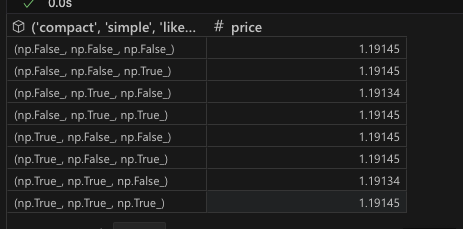

In [ ]:
# for odos is it important to set like asset = true, n=2, -.00011, and .00031 bps, of price, diff
# the other dosn't seem to matter